In [1]:
import os
import sys

import numpy as np

import matplotlib
from matplotlib        import pyplot as plt
from matplotlib        import cm
from matplotlib.ticker import LinearLocator

WORKSPACE_PATH  = os.environ['WORKSPACE_PATH']
plt.style.use(WORKSPACE_PATH+'/ROMNet/romnet/extra/postprocessing/presentation.mplstyle')

import cantera         as ct

from scipy.integrate import solve_ivp

In [2]:
### Create Mixture
gas      = ct.Solution('gri30.yaml', energy_enabled=False)
T0       = 300.
T        = 1000.
P0       = 10. * ct.one_atm

gas.TPX  = T0, P0, 'CH4:0.5, O2:1, N2:3.76'
rho0     = gas.density
y0       = gas.Y[0:-1]

In [3]:
def IdealGasConstV_SciPY(t, y):
    Y        = np.append(y,1.-np.sum(y))
    
    gas.TDY  = T, rho0, Y
    
    wdot     = gas.net_production_rates

    ydot     = wdot * gas.molecular_weights / rho0  
    
    return ydot[0:-1]

In [4]:
tMin     = 1.e-6
tMax     = 1.e0
dt0      = 1.e-8
tStratch = 1.05
tVec     = [0.0]
t        = tMin
dt       = dt0
while (t <= tMax):
    tVec.append(t)
    t   = t + dt
    dt *= tStratch

In [5]:
rtol    = 1.e-10
SOLVER  = 'BDF'

output  = solve_ivp( IdealGasConstV_SciPY, (tVec[0],tVec[-1]), y0, method=SOLVER, t_eval=tVec, rtol=rtol )

[0.         0.         0.         0.22014124 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.05518667 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.7246721
 0.         0.         0.         0.        ]


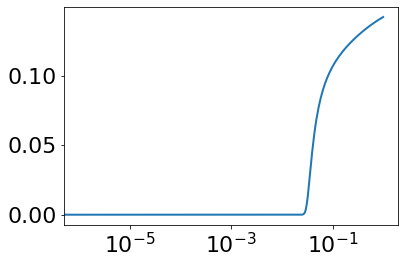

In [6]:
plt.plot(output.t, output.y[gas.species_names.index('CO2'),:])
plt.xscale('log')